# Exercise: Classify Flowers with a Decision Tree

In this exercise, we'll classify three different iris flower types using a decision tree classifier. 

Your tasks are the following:

- Identify the data types of `X` and `y`
- Get an overview of the dataset
- Plot a histogram of the data
- Split into training and test data
- Examine the shape of your training data
- Train a decision tree
- Make predictions with your model
- Calculate the accuracy

## 1. Data Analysis

In [33]:
# import packages
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# load data
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

#or alternatively
#from sklearn import datasets
#iris = datasets.load_iris()
#list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [35]:
iris.data.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [36]:
iris.data['target']=iris.target

In [37]:
# store features and labels in X and y
X = iris.data.drop('target',axis=1)
y = iris.target

In [38]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [39]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [42]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


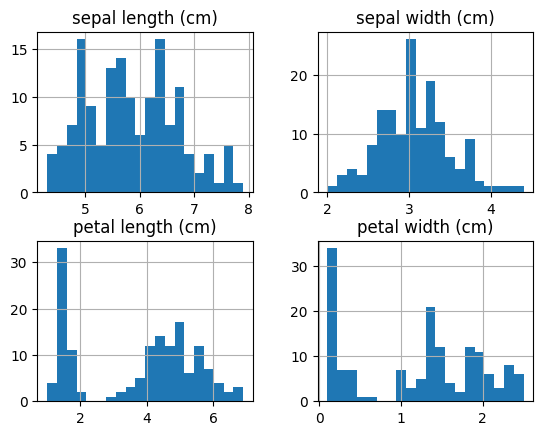

In [45]:
X.hist(bins=20)
plt.show()
#the result shows the for classification problem, 'petal length' and 'petal width' might be particularly helpful as their data seemed to fall in a binary mode. 

In [6]:
# print description of dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
type(X)

pandas.core.frame.DataFrame

**TODO**: Which data types are X and y, respectively?

In [9]:
# TODO: YOUR CODE GOES HERE
type(iris)

sklearn.utils._bunch.Bunch

**YOUR ANSWER**:

**TODO**: Get an overview of the dataset and answer the following questions:
- How many features are in the dataset?
- How many samples are in the dataset?
- Which labels do exist?
- Are there empty data entries that we have to take care of?
- Are there categorical or numerical attributes?

In [10]:
# TODO: YOUR CODE GOES HERE
iris.data.describe()

#showing four features 
#150 rows - 150 samples 
#feature names appeared below 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
iris.data.info()
#no empty cells
#all numerical values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**YOUR ANSWER**:

**TODO**: Plot a histogram of the data. Can you guess which features might be more important than others?

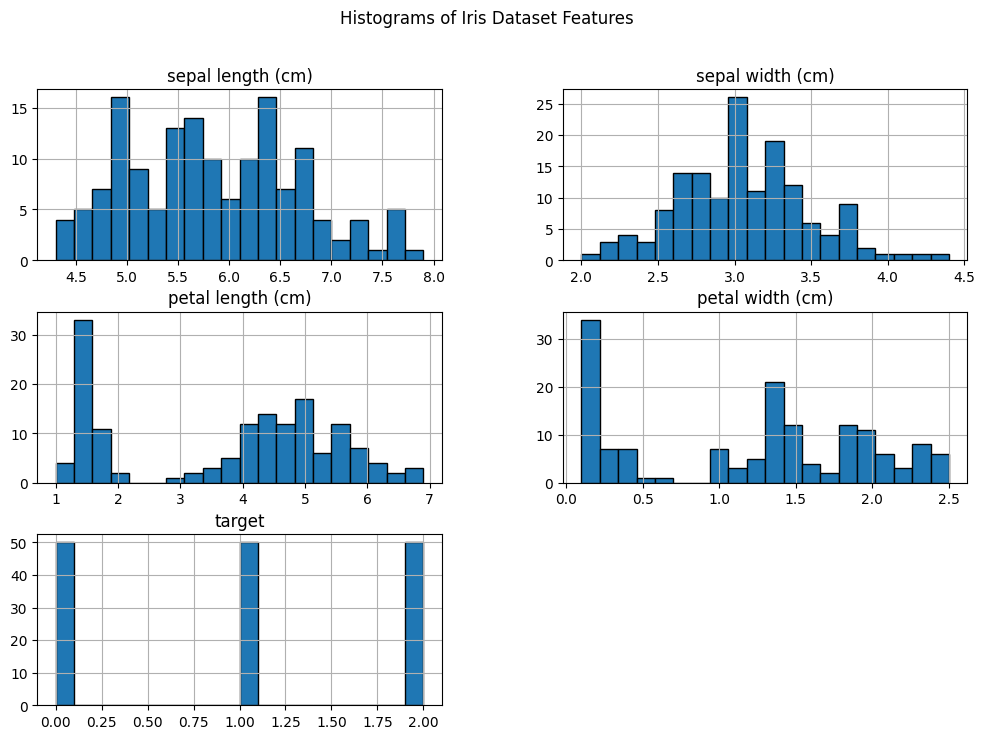

In [12]:
# TODO: YOUR CODE GOES HERE
iris.data.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Iris Dataset Features")
plt.show()

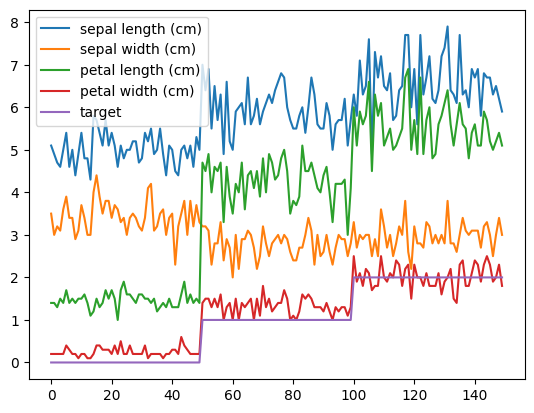

In [13]:
iris.data.plot()
plt.show()

In [14]:
corr_matrix=iris.data.corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


In [15]:
corr_matrix['target'].sort_values(ascending=False)
#from here, we ca conclude that in addition to sepal width (cm), the rest of the features are all very important to the target

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

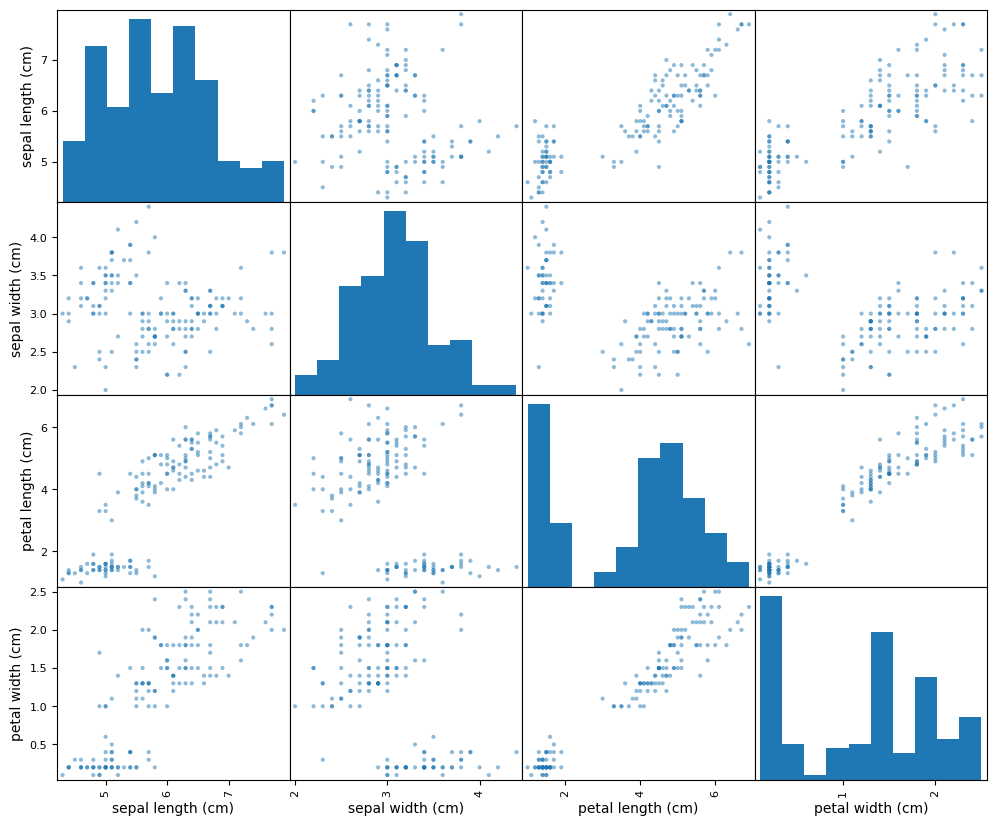

In [16]:
from pandas.plotting import scatter_matrix
features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
scatter_matrix(iris.data[features],figsize=(12,10))
plt.show()

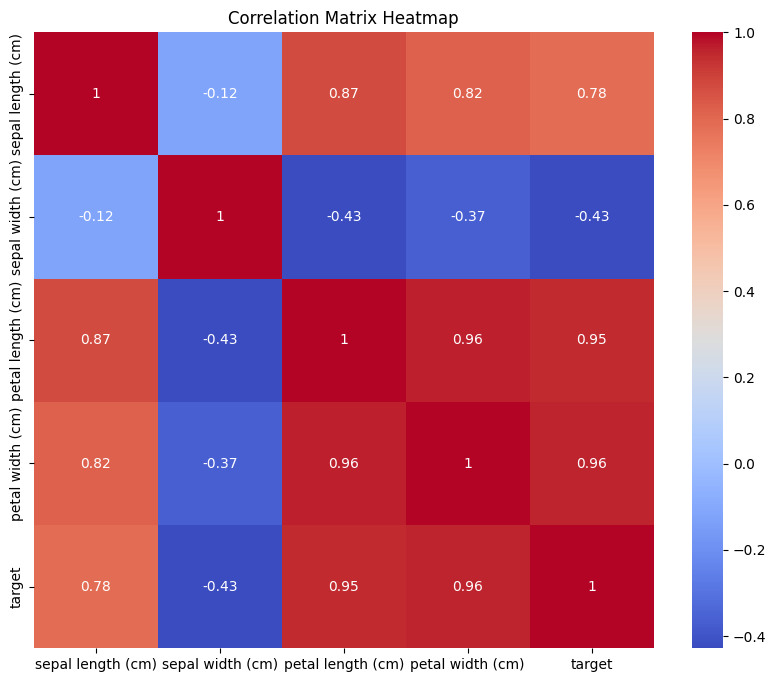

In [17]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**YOUR ANSWER**:

# 2. Training and Evaluation

In [62]:
# we only use 2 features for training
X = iris.data[["petal length (cm)", "petal width (cm)"]]

In [71]:
print(X)

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]


**TODO**: Split `X` and `y` in training and test data. Save the result in variables called `X_train`, `X_test`, `y_train`, `y_test`. 

In [78]:
# TODO: YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
#random_state=0 ensure the same split of data will be used

**TODO**: How many samples are contained in `X_test`? Which data format do we have here?

In [79]:
print(X_test.shape)
print(X_train.shape)
#there are 38 samples in X_test
#and 112 samples in X_train

(38, 2)
(112, 2)


In [75]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
# TODO: YOUR CODE GOES HERE

**YOUR ANSWER**:

**TODO**: Fit a `DecisionTreeClassifier` with `max_depth=3` and `random_state` set to a value of your choice on the training data!

In [80]:
# TODO: YOUR CODE GOES HERE
from sklearn.tree import DecisionTreeClassifier
regularised_tree_model=DecisionTreeClassifier(random_state=0,max_depth=3)
regularised_tree_model.fit(X_train,y_train)
#max_depth to prevent overfitting

DecisionTreeClassifier(max_depth=3, random_state=0)

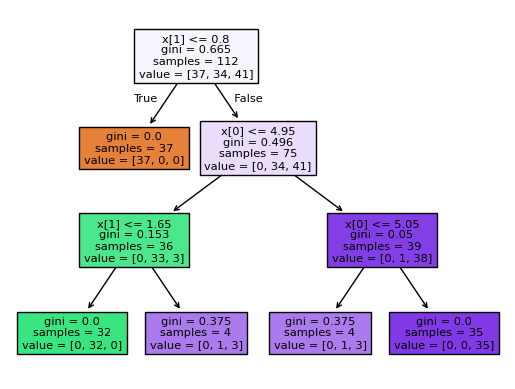

In [81]:
#plot the decision tree
from sklearn.tree import plot_tree
plot_tree(regularised_tree_model,filled=True)
plt.show()

**TODO**: Calculate the predictions on training and test data and save the result in `y_pred_train` and `y_pred_test`, respectively.

In [68]:
# TODO: YOUR CODE GOES HERE
y_pred_train=regularised_tree_model.predict(X_train)
y_pred_test=regularised_tree_model.predict(X_test)

In [69]:
y_train.shape

(112,)

**TODO**: Evaluate your model by calculating the accuracy on training and test data, i.e. the number of correctly classified samples normalized over all samples:

$
\text{Accuracy} = \frac{\text{\# correctly classified samples}}{\text{\# samples}}
$

In [70]:
# TODO: YOUR CODE GOES HERE
from sklearn.metrics import accuracy_score
accu_train=accuracy_score(y_pred_train,y_train)
accu_test=accuracy_score(y_pred_test,y_test)

print(f"Training Accuracy: {accu_train}")
print(f"Testing Accuracy: {accu_test}")

Training Accuracy: 0.9821428571428571
Testing Accuracy: 0.9736842105263158
